#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [27]:
## Reading the image plaksha_Faculty.jpg
img=cv2.imread(r"E:\Chrome Download\Plaksha_Faculty.jpg") 

  
## Convert the image to grayscale
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale =0.3 ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 1 ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img,text,(x,y-10),font,font_scale,font_color,font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

c:\Users\91881\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


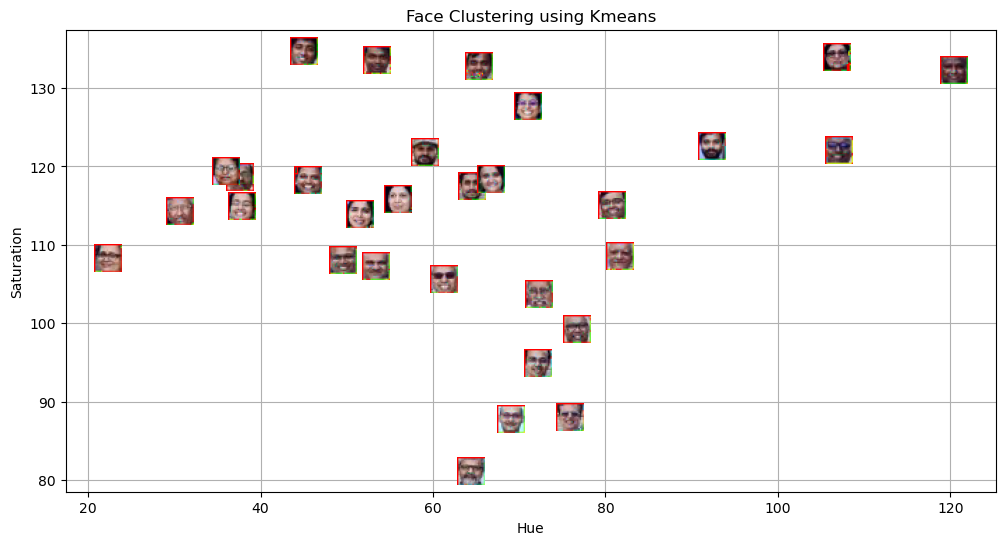

In [28]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title("Face Clustering using Kmeans")
plt.grid(True)
plt.show()

[]

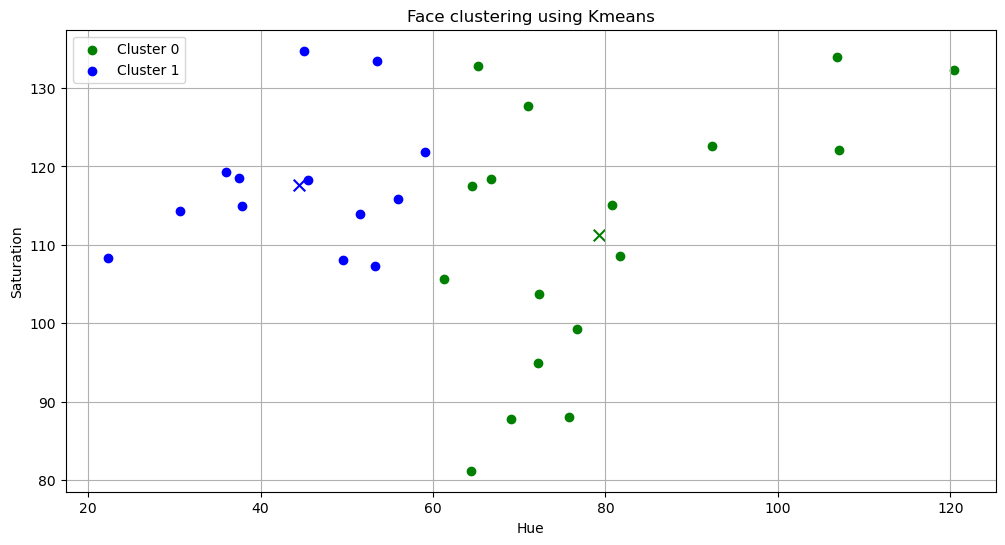

In [29]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color='green',label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color='blue',label='Cluster 1')

# Calculate and plot centroids
centroid_0 = (np.mean(cluster_0_points,axis=0))
centroid_1 =(np.mean(cluster_1_points,axis=0))

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],centroid_0[1],marker='x',color='green',s=70)
plt.scatter(centroid_1[0],centroid_1[1],marker='x',color='blue',s=70)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face clustering using Kmeans")
plt.legend()
plt.grid(True)
plt.plot()


In [30]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img =cv2.imread(r"E:\Chrome Download\Dr_Shashi_Tharoor.jpg") 
# Detect face  in the template image after converting it to gray and store it in template_faces
gray_template_img=cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

template_faces = face_cascade.detectMultiScale(gray_template_img, 1.05, 4, minSize=(25,25))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Shashi Tharoor",template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()     
 

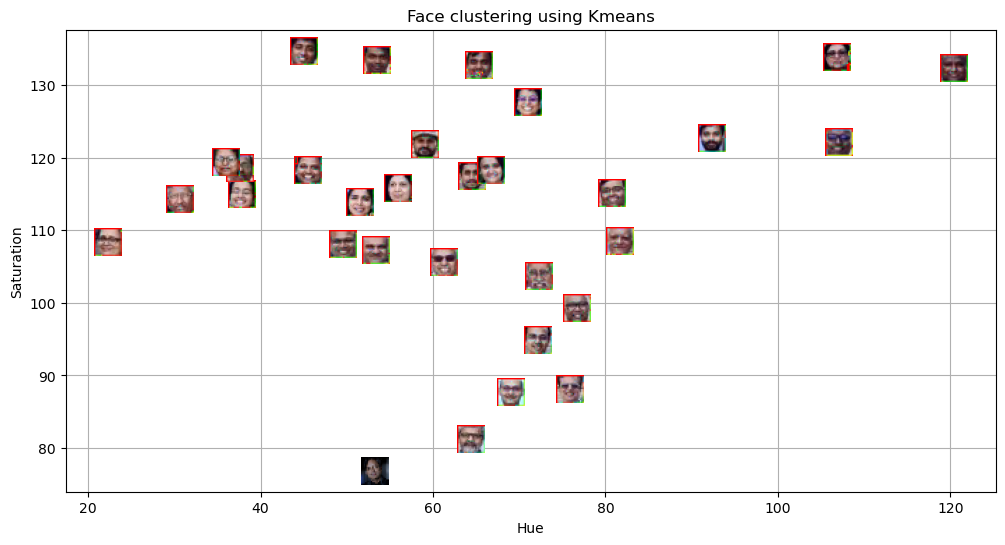

In [31]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
for (x, y, w, h) in template_faces:
    face = template_hsv[y:y + h, x:x + w]
    
template_hue = np.mean(face[:, :, 0])
template_saturation = np.mean(face[:, :, 1])

# Predict the cluster label for the template image and store it in template_label

template_label = kmeans.predict(np.array([[template_hue,template_saturation]]))

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)
plt.plot(template_hue,template_saturation,'o', markersize=5, color=color)


plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face clustering using Kmeans")
plt.grid(True)
plt.show()


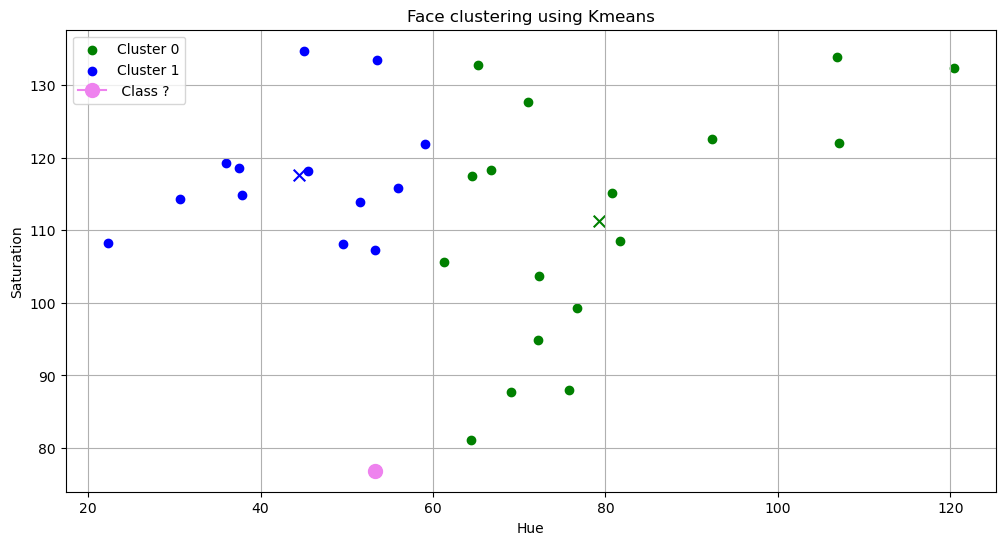

In [33]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color='green',label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color='blue',label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points,axis=0)
centroid_1=np.mean(cluster_1_points,axis=0)
plt.scatter(centroid_0[0],centroid_0[1],marker='x',color='green',s=70) ## plot for centroid 0
plt.scatter(centroid_1[0],centroid_1[1],marker='x',color='blue',s=70)  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face clustering using Kmeans")
plt.legend()
plt.grid(True)
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Distance-based classifiers (e.g., KNN) rely on measuring similarity between data points. Common distance metrics include:
Euclidean Distance
Manhattan Distance 
Minkowski Distance
Chebyshev Distance
Cosine Distance / Cosine Similarity
Hamming Distance 
Mahalanobis Distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
Distance-based algorithms such as K-Nearest Neighbors (KNN) are widely used in:
Image Recognition – Face detection, handwritten digit recognition.
Medical Diagnosis – Disease prediction based on patient features.
Recommendation Systems – Finding similar users or products.
Document Classification – Spam detection and sentiment analysis.
Anomaly Detection – Fraud detection in banking systems.
Pattern Recognition – Speech recognition and biometric systems.

#### 3. Explain various distance metrics. 

Distance metrics are mathematical measures used to determine the similarity or dissimilarity between data points in distance-based classification algorithms such as K-Nearest Neighbors (KNN).

##### 1. Euclidean Distance (L2 Norm)
The straight-line distance between two points in Euclidean space.

$$
d(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$
- Most commonly used distance metric.
- Sensitive to feature scaling.
- Suitable for continuous numerical data.

---

##### 2. Manhattan Distance (L1 Norm)
The sum of absolute differences between corresponding coordinates.

$$
d(x,y) = \sum_{i=1}^{n} |x_i - y_i|
$$

- Less sensitive to outliers than Euclidean distance.
- Works well when features are independent.

---

##### 3. Minkowski Distance

A generalized form of distance metric.

$$
d(x,y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}
$$

- When \( p = 1 \), it becomes Manhattan Distance.
- When \( p = 2 \), it becomes Euclidean Distance.

---

##### 4. Chebyshev Distance

The maximum absolute difference between corresponding coordinates.

$$
d(x,y) = \max |x_i - y_i|
$$

- Useful in grid-based movement problems.
- Sensitive to the largest coordinate difference.

---

##### 5. Cosine Distance

Measures the angle between two vectors rather than magnitude.

$$
\text{Cosine Similarity} = \frac{x \cdot y}{||x|| \, ||y||}
$$

- Common in text classification and NLP.
- Focuses on direction rather than scale.

---

##### 6. Hamming Distance

The number of positions at which corresponding elements differ.

- Used for binary or categorical data.
- Applied in coding theory and error detection.

---

##### 7. Mahalanobis Distance

Measures distance considering correlation between features.

$$
d(x,y) = \sqrt{(x - \mu)^T S^{-1} (x - \mu)}
$$

Where:
- $$(\mu)is the mean vector
- \( S \) is the covariance matrix

- Scale-invariant.
- Effective when features are correlated.


#### 4. What is the role of cross validation in model performance? 
Cross-validation is a resampling technique used to evaluate model performance and ensure generalization.
Purpose:
Prevents overfitting.
Provides reliable estimate of model accuracy.
Helps in hyperparameter tuning (e.g., selecting optimal K in KNN).
Common Method:
K-Fold Cross-Validation
Dataset is divided into K subsets.
Model is trained on K−1 folds and tested on 1 fold.
Process repeats K times.
Final performance is averaged.
It improves robustness and reduces variance in performance estimation.

#### 5. Explain variance and bias in terms of KNN? 
In K-Nearest Neighbors, bias and variance depend on the value of K.
Small K (e.g., K = 1)
Low bias
High variance
Model fits training data closely.
Sensitive to noise and outliers.
May lead to overfitting.

Large K
High bias
Low variance
Decision boundary becomes smoother.
May underfit the data.

Bias-Variance Tradeoff:
Choosing optimal K balances bias and variance.
Cross-validation is typically used to select the best K.